# Logistic Regression

Just as we have linear and polynomial regression for predicting numerical values, we have another type of regression for predicting class labels of data, namely **logistic regression**. 

The reason its called logistic regression is because it makes use of the logistic function to generate output values. The logistic function is defined as:

$g(z) = \frac{1}{1 + e^{-z}}$



The reason we use the logistic function is because its range is bounded between 0 and 1. Anything else comes to mind when talking about values between 0 and 1? Probabilities! Probability and classification are deeply related.

<img src="https://drive.google.com/uc?export=view&id=1db86qd4W_4erTMC9no5P4ylWze6c2j7V" width="500" height="350" align="middle"/>

## Why use logistic function? Why not use linear regression? 

Let's see why we can't use linear regression for classification tasks with the help of an example.

In [1]:
import numpy as np
import pandas as pd
import random
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

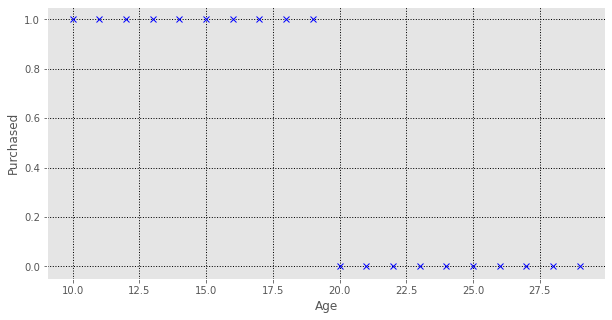

In [2]:
x = np.array([i for i in range(10,30)])
y = np.concatenate([np.ones(10), np.zeros(10)])

fig = plt.figure(figsize=(10,5))
xlabel = 'Age'
ylabel = 'Purchased'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(color='k', linestyle=':', linewidth=1)
_ = plt.plot(x, y, 'xb')

Suppose we have some product, and we collected data on the relationship between the age of a customer, and whether they purchased the item or not. Customers aged between 10 and 19 made the purchase (purchased=1), whereas those customers above the age of 19 did not (purchased=0).


Now, let's try and fit linear regression and logistic regression models to this data, and test it.

In [3]:
def linear_regression(x,y):

    lin_regression = LinearRegression()
    lin_regression.fit(pd.DataFrame(x), y)

    lin_y_pred_1 = lin_regression.predict(pd.DataFrame(x))

    line_point_5 = x * 0 + .5

    fig = plt.figure(figsize=(10,5))
    xlabel = 'Age'
    ylabel = 'Purchased'
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(color='k', linestyle=':', linewidth=1)
    plt.plot(x, y, 'xb')
    plt.plot(x, lin_y_pred_1, '-r')
    plt.plot(x, line_point_5,'-g')
    plt.legend(["Data Points","Linear Regression Model","Decision Boundary"])
    plt.show()

    return lin_regression

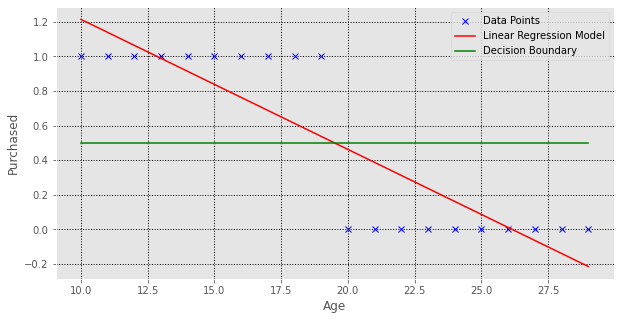

In [4]:
lin_regression = linear_regression(x,y)

The green line is called the decision boundary, which is basically the line that divides the two classes on the cartesian plane.

In [5]:
test_x = np.array([i for i in range(10,35,5)])
test_y_pred = lin_regression.predict(pd.DataFrame(test_x))
test_y_pred

array([ 1.21428571,  0.83834586,  0.46240602,  0.08646617, -0.28947368])

Since linear regression predictions are not probabilities, values greater than 0.5 are considered to belong to positive purchase class.

In [12]:
def logistic_regression(x,y):

    log_regression = LogisticRegression()

    log_regression.fit(pd.DataFrame(x), y)

    y_pred = log_regression.predict_proba(pd.DataFrame(x))
    log_y_pred_1 = [item[1] for item in y_pred]

    line_point_5 = x * 0 + .5

    fig = plt.figure(figsize=(10,5))
    xlabel = 'Age'
    ylabel = 'Purchased'
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(color='k', linestyle=':', linewidth=1)
    plt.plot(x, y, 'xb')
    plt.plot(x, log_y_pred_1, '-r')
    plt.plot(x, line_point_5,'-g')
    plt.legend(["Data Points","Logistic Regression Model","Decision Boundary"])
    plt.show()

    return log_regression

**Q:** What do you observe from the two graphs? Hint: think in terms of the decision boundary....

**A:** According to the linear regression model, any age greater than 19 would belong to class 0 (no purchase), and any age less than or equal to 19 would belong to class 1 (purchase made). The logistic regression curve follows the same trend. We can think of the age 19 as a turning point of sorts.

Now, say we've collected more data the next day, and add the new data to the existing data we had from day 1. We find that customers aged between 60 and 70 did not make a purchase, which is aligned with our earlier data as well.

In [10]:
x = np.append(x, np.array([i for i in range(60,70)]))
y = np.append(y, np.zeros(10))

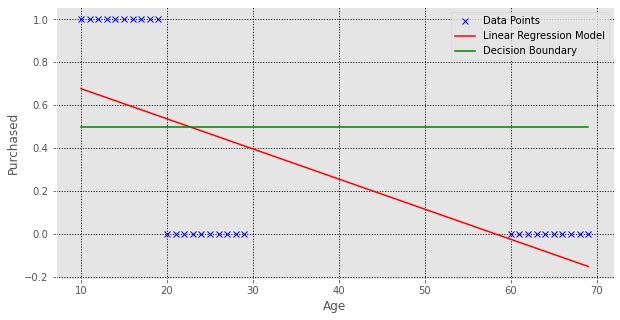

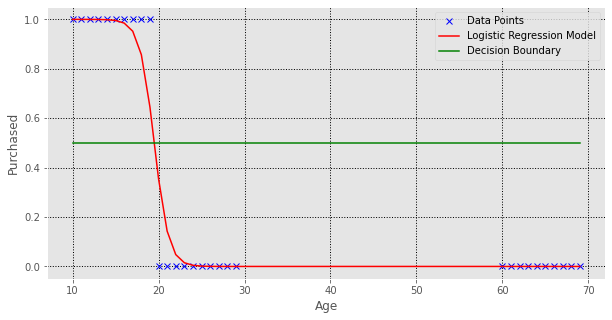

In [13]:
lin_regression = linear_regression(x,y)
log_regression = logistic_regression(x,y)

In [14]:
test_x = np.array([i for i in range(18,26)])

test_y_pred_lin = lin_regression.predict(pd.DataFrame(test_x))
print("Linear Regression Predictions:")
print(test_y_pred_lin)

test_y_pred_log = log_regression.predict_proba(pd.DataFrame(test_x))[:,1]
print("Logistic Regression Predictions:")
print(test_y_pred_log)

Linear Regression Predictions:
[0.56495292 0.55091537 0.53687781 0.52284026 0.50880271 0.49476516
 0.48072761 0.46669006]
Logistic Regression Predictions:
[0.85713668 0.64502441 0.35497751 0.14286435 0.04805457 0.01505849
 0.00460907 0.00140042]


We can now see where linear regression fails. The model tries to fit as many points as it can. By doing so, the turning point which was earlier 19 has now increased to 23, which is clearly wrong for the values 20, 21 and 22, which can be seen from the predictions on the test data.

\

On the other hand, the logistic regression model predicts the classes correctly, and perfectly models the relationship between the data. 

What we can conclude from these observations are that a probabilistic model is required for classification problems. 

## Applying logistic regression to titanic Dataset

Let's see logistic regression in action with the titanic dataset. 

In [16]:
## importing the data 
titanic = pd.read_csv('https://raw.githubusercontent.com/monalisapatra26/ML4Science/main/Classification/Logistic%20Regression/train.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
# Check and fill in the missing values in the data.
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# Fill the missing values
# Age --> Fill with the median(28)
# Cabin --> Drop this column
# Embarked --> Fill with the "S"

train_df = titanic.copy()
train_df["Age"].fillna(train_df["Age"].median(skipna=True),inplace=True)
train_df["Embarked"].fillna(value="S",inplace=True)
train_df.drop(columns=["Cabin"],axis=1,inplace=True)

In [21]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
# Feature Engineering 

train_df['Alone'] = np.where((train_df["SibSp"] + train_df["Parch"]) > 0, 0, 1)
train_df.drop('SibSp', axis=1, inplace=True)
train_df.drop('Parch', axis=1, inplace=True)

In [23]:
# Encoding 

train_df = pd.get_dummies(train_df,columns=["Pclass","Embarked","Sex"],drop_first=True)

In [24]:
# Drop the columns that are not useful for our analysis.

train_df.drop(columns=["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [25]:
train_df.head()

,Survived,Age,Fare,Alone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,1,0,1,1


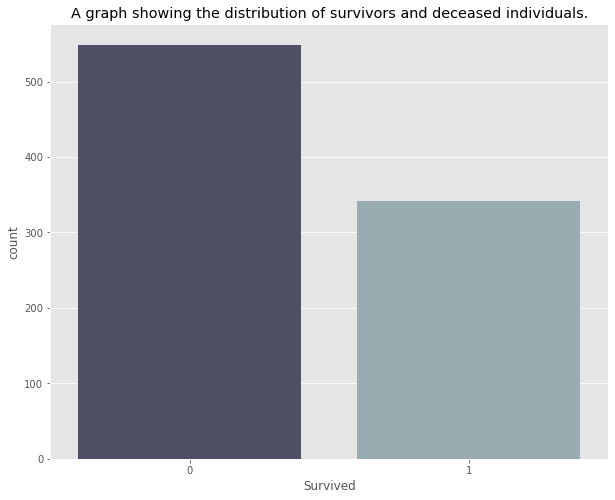

In [42]:
sns.countplot(x=titanic["Survived"],data=titanic,palette="bone")
plt.title("A graph showing the distribution of survivors and deceased individuals.")
plt.show()

In [26]:
# Features and Label

X = train_df.drop("Survived",axis=1)
y = train_df["Survived"]
print("X shape: ",X.shape)
print("y shape: ",y.shape)

X shape:  (891, 8)
y shape:  (891,)


In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [29]:
# Scale 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scale_cols = ['Age', 'Fare', 'Alone', 'Pclass_2', 'Pclass_3', 'Embarked_Q',
       'Embarked_S', 'Sex_male']

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [30]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (712, 8)
Shape of X_test:  (179, 8)
Shape of y_train:  (712,)
Shape of y_test:  (179,)


In [32]:
log_reg = LogisticRegression()
log_reg = log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

In [38]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)*100))

Accuracy of logistic regression classifier on test set: 79.89


## Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[97 14]
 [22 46]]


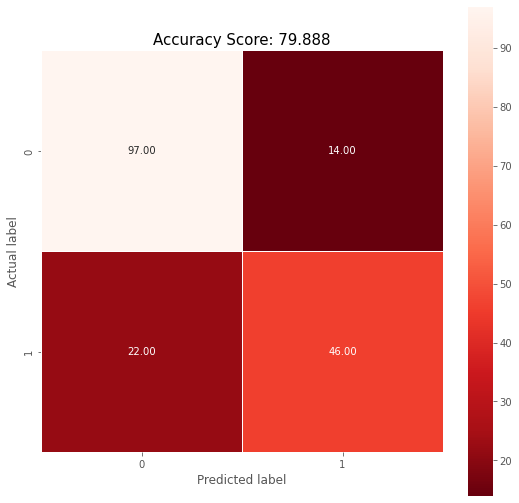

In [41]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(log_reg.score(X_test, y_test)*100,3))
plt.title(all_sample_title, size = 15);

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       111
           1       0.77      0.68      0.72        68

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



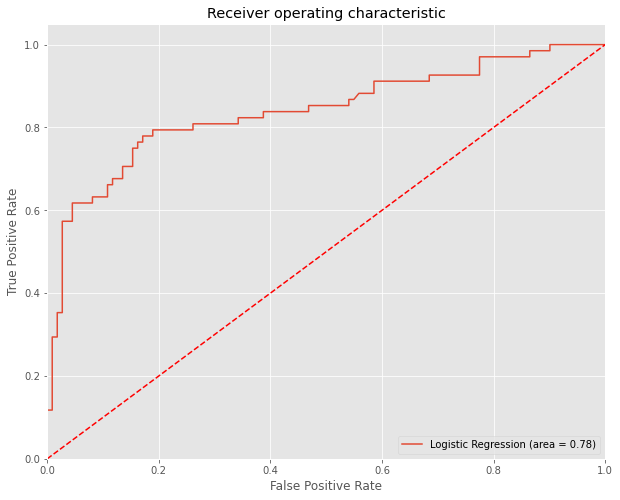

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()